In [120]:
from llama_cpp import Llama
import re
import string

path = "C:/Users/georg/Downloads/orca-mini-3b.ggmlv3.q4_0.bin"
llm = Llama(path, logits_all = True, n_gpu_layers=100000)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


In [136]:
privateChars = ["\uE000", "\uE001", "\uE002", "\uE003", "\uE004", "\uE005", "\uE006", "\uE007", "\uE008", "\uE009"]

def generateText(prompt, tokens = 1, temperature = 0, topP = 0.5, echo = False,stop = ["#"]):
    
    output = llm(prompt, max_tokens = tokens, temperature = temperature, top_p = topP, 
                 echo=echo, stop=stop, logprobs = 10)
    
    return output

def findSpaces(inputString):
    spaceIndexes = [0]
    for i, char in enumerate(inputString):
        if char == ' ':
            spaceIndexes.append(i)
    return spaceIndexes

def removePunctuation(inputString):
    translator = str.maketrans('', '', " ") 
    return inputString.translate(translator)

def encode(plain, searchLength = 10):
    words = plain.split()
    
    for i, word in reversed(list(enumerate(words))):
        word = removePunctuation(word)
        startInd = max(0, i - searchLength)
        plainSection = " ".join(words[startInd: i])
        output = generateText(plainSection)

        try:
            choiceDict = output["choices"][0]["logprobs"]["top_logprobs"][0]
            choiceDict  = {removePunctuation(key) : value for key, value in choiceDict.items()}
        except:
            choiceDict = {"empty" : "empty"}

        if word in choiceDict:
            keys = list(choiceDict.keys())
            words[i] = privateChars[keys.index(word)]

    return " ".join(words)

def decode(encoded, searchLength = 10):
    words = encoded.split()

    pattern = "|".join(re.escape(char) for char in privateChars)
    preds  = [i for i, s in enumerate(words) if re.search(pattern, s)]
    
    for pred in preds:
        startInd = max(0, pred - searchLength)
        plainSection = " ".join(words[startInd: pred])
        output = generateText(plainSection)

        choiceDict = output["choices"][0]["logprobs"]["top_logprobs"][0]
        choiceDict = {removePunctuation(key) : value for key, value in choiceDict.items()}
        
        keys = list(choiceDict.keys())
        wordChoice = privateChars.index(words[pred])
        words[pred] = keys[wordChoice].strip()
        
    return " ".join(words)
    

In [139]:
import time

#plain = "A large language model (LLM) is a language model characterized by its large size. Their size, which could be as large as 180 billion parameters, is enabled by AI accelerators, which are able to process vast amounts of text data, mostly scraped from the Internet."

f = open("toEncode.txt")
plain = f.read()
f.close()
plain = plain.replace("\n", "")

startTime = time.time() 
encoded = encode(plain, 20)
endTime = time.time()

executionTime = endTime - startTime 
print("Time to encode:", executionTime)

print(encoded)

startTime = time.time() 
decoded = decode(encoded, 20)
endTime = time.time()

executionTime = endTime - startTime 
print("Time to decode:", executionTime)
print(decoded)


assert decoded == plain
print("Decoded correctly")
print(len(encoded) / len(plain))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.gene

Time to encode: 7331.3189578056335
"This   last call  Jaunt-701,"  pleasant   echoed   Blue Concourse  New York's Port  Terminal.  PAT  not               gungy    frightening.  automated female   probably   plesant   it. "This  Jaunt Service to Whitehead City, Mars,"   continued. "All ticketed       Blue Concourse sleep lounge. Make   validation papers   order.  you."The upstairs   not at  grungy.   wall-to-wall carpeted  oyster gray.    an eggshell   hung  plesant nonrepresentational prints.  steady, soothing progression  colors met and swirled on  ceiling. There  one  couches   large room, neatly spaced    ten. Five Jaunt attendants circulate, speakingin low, cherry      milk. At        entranceway, flanked  armed   another Jaunt attendant     validation papers  a latecomer,  harried-looking    New  World  folded   arm. Directly opposite,  floor dropped    trough about     perh

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.gene

Time to decode: 3792.0746641159058
"This is the last call for Jaunt-701," the pleasant female voice echoed through the Blue Concourse of New York's Port Authority Terminal. The PAT had not changed much in the last three hundred years or so - it was still gungy and a little frightening. The automated female voice was probably the most plesant thing about it. "This is Jaunt Service to Whitehead City, Mars," the voice continued. "All ticketed passengers should now be in the Blue Concourse sleep lounge. Make sure your validation papers are in order. Thank you."The upstairs lounge was not at all grungy. It was wall-to-wall carpeted in oyster gray. The walls were an eggshell white and hung with plesant nonrepresentational prints. A steady, soothing progression of colors met and swirled on the ceiling. There were one hundred couches in the large room, neatly spaced in rows of ten. Five Jaunt attendants circulate, speakingin low, cherry voices and offering glasses of milk. At one side of the r

In [ ]:
"""
encodedList = []
timeList = []
for i in range(10):
    startTime = time.time() 
    encoded = encode(plain, i + 1)
    endTime = time.time()
    executionTime = endTime - startTime 
    encodedList.append(encoded)
    timeList.append(executionTime)
    print(executionTime)"""


True


'\nencodedList = []\ntimeList = []\nfor i in range(10):\n    startTime = time.time() \n    encoded = encode(plain, i + 1)\n    endTime = time.time()\n    executionTime = endTime - startTime \n    encodedList.append(encoded)\n    timeList.append(executionTime)\n    print(executionTime)'

In [ ]:
print(len(encodedList[0]))
print(len(plain))

#for 10 it goes to 8935
#for 20 it goes to 8580
#for 40 it goes 8362

8935
12579


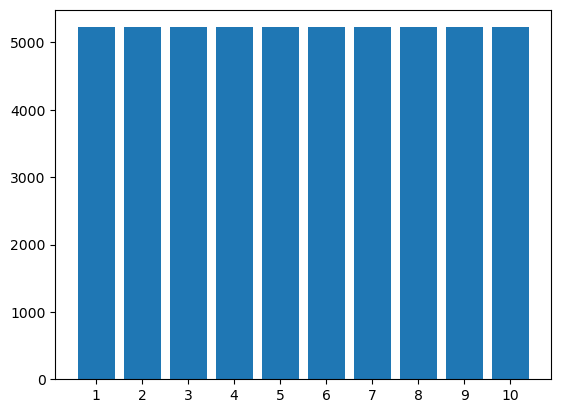

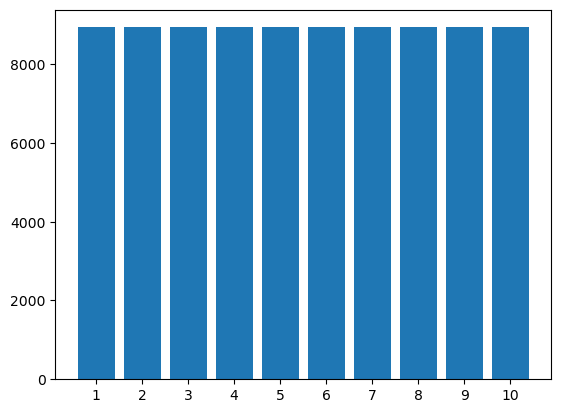

In [ ]:
import matplotlib.pyplot as plt
lengthList = [len(encoded) for encoded in encodedList]
searchList = [str(i + 1) for i in range(10)]
plt.bar(searchList, timeList) 
plt.show()
plt.bar(searchList, lengthList) 
plt.show()